### Quantum Emoticon

This program aims to accomplish what "Hello World" does for classical programming.

Anything that can be done with bits can be done with qubits. Simply leave a qubit in its initialized value for the state 0, or use an operation with the effect of a NOT gate (such as X or Y) to rotate it to a 1. Each qubit then becomes a bit, allowing us to implement "Hello, World!" directly on a quantum computer.

In practice, it is not so straightforward. ASCII encoding of "Hello, World!" requires over 100 bits, and therefore over 100 qubits. Current quantum devices are not yet large enough for the job.

However, two ASCII characters require only 14 (qu)bits. Writing an emoticon like ;) can therefore be done using ibmq_16_melbourne.

The string corresponding to ;) is

;)  =  '01110110101001'

To prepare this state we can perform an X on qubits 0, 3, 5, 7, 8, 10, 11, 12. Here we number the bits from 0 to 13, from right to left.

Of course, just writing a bit string in some qubits isn't very quantum. Instead we can prepare a superposition of two different emoticons. We choose ;) and 8), which correspond to the bit strings

8)  =  '01110000101001'
;)  =  '01110110101001'

Note that these strings differ only on bits 7 and 8. It is therefore only these on which the superposition must be prepared. The superposition will be of the '00' of 8), and the '11' of ;) , and so will be a standard Bell state.

Reference:https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/index.ipynb#1.2-Qiskit-Terra

In [2]:
# import libraries 
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ, BasicAer 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# set up registers and program
qr = QuantumRegister(14)  #create a quantum register of 14 bits
cr = ClassicalRegister(14) #create a classical regiter of 14 bits
qc = QuantumCircuit(qr, cr) #create a quantum circuit

# rightmost seven (qu)bits have ')' = 0101001
qc.x(qr[0])
qc.x(qr[3])
qc.x(qr[5])

# second seven (qu)bits have superposition of
# '8' = 0111000
# ';' = 0111011
# these differ only on the rightmost two bits
qc.h(qr[8]) # create superposition on 9
qc.cx(qr[8],qr[7]) # spread it to 8 with a CNOT
qc.x(qr[10])
qc.x(qr[11])
qc.x(qr[12])

# measure
for j in range(14):
    qc.measure(qr[j], cr[j])

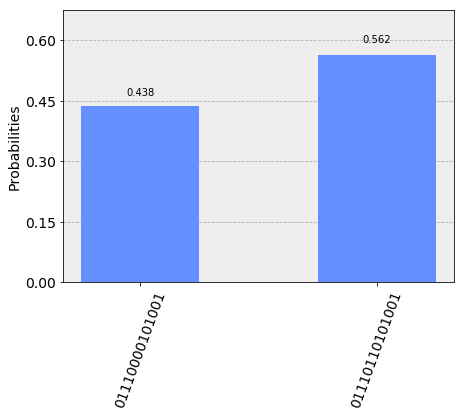

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
shots_sim = 128   # run on 128 shots

job_sim = execute(qc, backend, shots=shots_sim)
stats_sim = job_sim.result().get_counts()

plot_histogram(stats_sim)


0.4375	8)
0.5625	;)


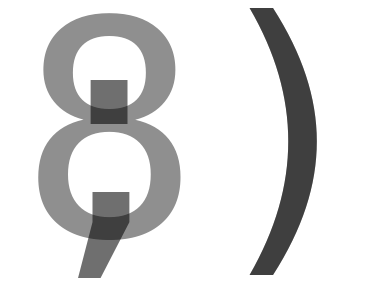

In [5]:
plt.rc('font', family='monospace')

def plot_smiley (stats, shots):
    for bitString in stats:
        char = chr(int( bitString[0:7] ,2)) # get string of the leftmost 7 bits and convert to an ASCII character
        char += chr(int( bitString[7:14] ,2)) # do the same for string of rightmost 7 bits, and add it to the previous character
        prob = stats[bitString] / shots # fraction of shots for which this result occurred
        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)
        if (prob>0.05): # list prob and char for the dominant results (occurred for more than 5% of shots)
            print(str(prob)+"\t"+char)
    plt.axis('off')
    plt.show()
    
plot_smiley(stats_sim, shots_sim)